# Introducción a OpenCV

Para poder usar esta libreta es necesario tener instalado
OpenCV 3.X y Matplotlib
Se pueden instalar con ***pip*** de la siguiente manera

> $ pip3 install opencv-python matplotlib

## Leyendo imágenes

### Importar bilbiotecas necesarias

In [1]:
from matplotlib import pyplot as plt
import cv2

### Cargando imagen

La imagen tiene el nombre de *lena.png* y se encuentra en la carpeta *img*

**shape** representa el ancho, alto y los canales que contiene la imagen.

**dtype** es el tipo de dato con el que está representado el valor de cada pixel.


### Cargando imagen en escala de grises

Shape: (220, 220)
Dtype: uint8


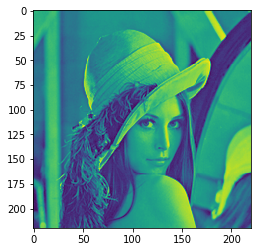

In [2]:
img = cv2.imread('img/lena.png', cv2.IMREAD_GRAYSCALE)
assert img is not None
print('Shape:', img.shape)
print('Dtype:', img.dtype)
plt.imshow(img)

Shape: (220, 220, 3)
Dtype: uint8


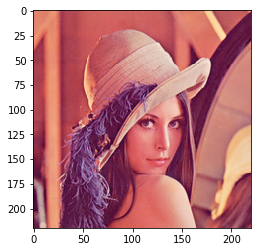

In [3]:
img = cv2.imread('img/lena.png')
assert img is not None
print('Shape:', img.shape)
print('Dtype:', img.dtype)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Para mostrar con matplotlib en RGB
plt.imshow(img)

## Transformaciones básicas

### Cambiando tamaño a la imagen

Tamaño original: (220, 220, 3)
Cambiando tamaño a 128x256 - Shape: (256, 128, 3)


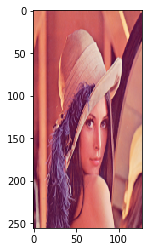

In [4]:
print('Tamaño original:', img.shape)
width, height = 128, 256
resized_img = cv2.resize(img, (width, height))
print('Cambiando tamaño a {}x{} - Shape: {}'.format(width, height, resized_img.shape))
plt.imshow(resized_img)

### Cambiando tamaño con multiplicadores

Shape: (110, 55, 3)


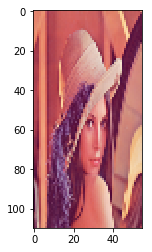

In [5]:
w_mult, h_mult = 0.25, 0.5
resized_img = cv2.resize(img, (0, 0), resized_img, w_mult, h_mult)
print('Shape:', resized_img.shape)
plt.imshow(resized_img)

### Cambiando tamaño usando un interpolador usando el vecino más cercano

Aumentado tamaño de la imagen: (880, 440, 3)


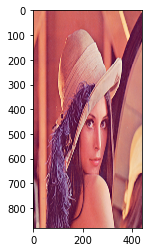

In [6]:
w_mult, h_mult = 2, 4
resized_img = cv2.resize(img, (0, 0), resized_img, w_mult, h_mult, cv2.INTER_NEAREST)
print('Aumentado tamaño de la imagen:', resized_img.shape)
plt.imshow(resized_img)

### Reflejando la imagen sobre el eje X

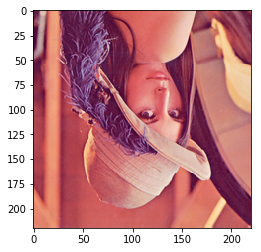

In [7]:
img_flip_along_x = cv2.flip(img, 0)
plt.imshow(img_flip_along_x)

### Reflejando sobre el eje Y

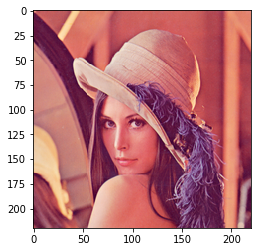

In [8]:
img_flip_along_y = cv2.flip(img, 1)
plt.imshow(img_flip_along_y)

### Reflejando sobre ambos ejes

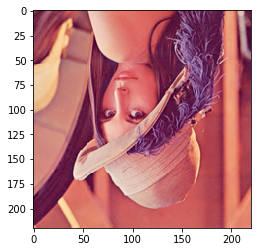

In [9]:
img_flipped_xy = cv2.flip(img, -1)
plt.imshow(img_flipped_xy)

## Guardando imágenes

### Guardando la misma imagen (formato png)

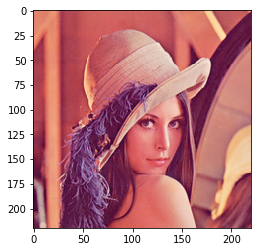

In [10]:
cv2.imwrite('img/lena_compressed.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 0])
saved_img = cv2.imread('img/lena_compressed.png')
assert saved_img.all() == img.all()
plt.imshow(saved_img)

### El formato *png* permite compresiones en el intervalo [0, 9]

Entre mayor sea el valor más pequeño será el tamaño del archivo

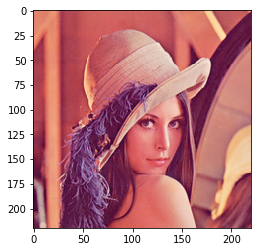

In [11]:
cv2.imwrite('img/lena_compressed.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 9])
saved_img = cv2.imread('img/lena_compressed.png')
assert saved_img.all() == img.all()
plt.imshow(saved_img)

### Guardando en formato JPEG

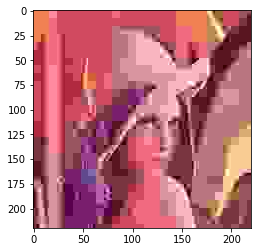

In [12]:
cv2.imwrite('img/lena_compressed.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 0])
saved_img = cv2.imread('img/lena_compressed.jpg')
plt.imshow(saved_img)
assert saved_img.all() == img.all()

### El formato *jpg* permite compresiones en el intervalo [0, 100]

Entre mayor sea el valor la calidad de la imagen será mejor

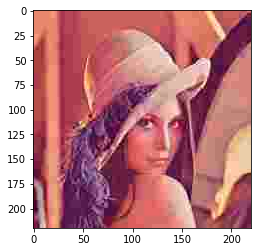

In [13]:
cv2.imwrite('img/lena_compressed.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 10])
saved_img = cv2.imread('img/lena_compressed.jpg')
plt.imshow(saved_img)

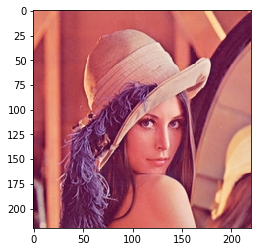

In [14]:
cv2.imwrite('img/lena_compressed.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 100])
saved_img = cv2.imread('img/lena_compressed.jpg')
plt.imshow(saved_img)

## Mostrando imágenes

In [15]:
orig_size = img.shape[0:2]
cv2.imshow('Imagen Original', img)
cv2.waitKey(2000)
cv2.destroyAllWindows()

# Elementos de la interfaz de usuario

In [16]:
import numpy as np

## Usando trackbar

In [17]:
cv2.namedWindow('ventana')
color = np.array([255, 255, 255], np.uint8)

def callback(canal, valor):
    color[canal] = valor
    
cv2.createTrackbar('R', 'ventana', 255, 255, lambda v: callback(2, v))
cv2.createTrackbar('G', 'ventana', 255, 255, lambda v: callback(1, v))
cv2.createTrackbar('B', 'ventana', 255, 255, lambda v: callback(0, v))

while True:
    background = np.full((500, 500, 3), color)
    cv2.imshow('ventana', background)
    key = cv2.waitKey(3)
    if key == 27:
        break
cv2.destroyAllWindows()

## Dibujando primitivas

In [18]:
import random

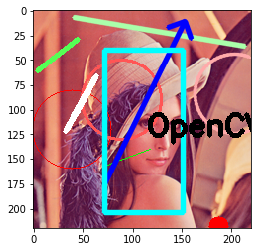

In [19]:
img_draw = np.copy(img)

w, h = img.shape[1], img.shape[0]

def rand_pt(mult=1):
    return (random.randrange(int(w*mult)), random.randrange(int(h*mult)))

cv2.circle(img_draw, rand_pt(), 40, (255, 0, 0))
cv2.circle(img_draw, rand_pt(), 10, (255, 0, 0), cv2.FILLED)
cv2.circle(img_draw, rand_pt(), 40, (255, 85, 85), 2)
cv2.circle(img_draw, rand_pt(), 40, (255, 170, 170), 2, cv2.LINE_AA)

cv2.line(img_draw, rand_pt(), rand_pt(), (0, 255, 0))
cv2.line(img_draw, rand_pt(), rand_pt(), (85, 255, 85), 3)
cv2.line(img_draw, rand_pt(), rand_pt(), (170, 255, 170), 3, cv2.LINE_AA)

cv2.arrowedLine(img_draw, rand_pt(), rand_pt(), (0, 0, 255), 3, cv2.LINE_AA)

cv2.rectangle(img_draw, rand_pt(), rand_pt(), (0, 255, 255), 3, cv2.LINE_AA)

cv2.ellipse(img_draw, rand_pt(), rand_pt(0.3), random.randrange(360), 0, 360, (255, 255, 255), 3)

cv2.putText(img_draw, 'OpenCV', rand_pt(), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)

plt.imshow(img_draw)

## Manejando entrada del teclado

Para dibujar se debe presionar alguna de las siguientes teclas:

    * p -> puntos
    * l -> líneas
    * r -> rectangulos
    * e -> elipses
    * t -> texto
    * c -> limpia imagen
    * esc -> salir

In [20]:
img_a_mostrar = np.copy(img)
img_a_mostrar = cv2.cvtColor(img_a_mostrar, cv2.COLOR_RGB2BGR)

def rand_pt():
    return (random.randrange(w), random.randrange(h))

fin = False

while not fin:
    cv2.imshow('resultado', img_a_mostrar)
    key = cv2.waitKey(0)
    if key == ord('p'):
        for pt in [rand_pt() for _ in range(10)]:
            cv2.circle(img_a_mostrar, pt, 3, (255, 0, 0), -1)
    elif key == ord('l'):
        cv2.line(img_a_mostrar, rand_pt(), rand_pt(), (0, 255, 0), 3)
    elif key == ord('r'):
        cv2.rectangle(img_a_mostrar, rand_pt(), rand_pt(), (0, 0, 255), 3)
    elif key == ord('e'):
        cv2.ellipse(img_a_mostrar, rand_pt(), rand_pt(), random.randrange(360),
                    0, 360, (255, 255, 0), 3)
    elif key == ord('t'):
        cv2.putText(img_a_mostrar, 'OpenCV', rand_pt(), cv2.FONT_HERSHEY_SIMPLEX, 1,
                   (0, 0, 0), 3)
    elif key == ord('c'):
        img_a_mostrar = np.copy(img)
        img_a_mostrar = cv2.cvtColor(img_a_mostrar, cv2.COLOR_RGB2BGR)
    elif key == 27:
        fin = True
        
cv2.destroyAllWindows()

## Manejando el mouse

Con el botón izquierdo se puede dibujar un rectangulo y si se presiona la
tecla ***c*** se corta la imagen al tamaño del rectangulo dibujado.

In [21]:
imagen = np.copy(img)
img_a_mostrar = np.copy(imagen)
img_a_mostrar = cv2.cvtColor(img_a_mostrar, cv2.COLOR_RGB2BGR)

boton_apretado = False
s_x = s_y = e_x = e_y = -1

def callback(evento, x, y, banderas, params):
    global img_a_mostrar, s_x, s_y, e_x, e_y, boton_apretado
    
    if evento == cv2.EVENT_LBUTTONDOWN:
        boton_apretado = True
        s_x, s_y = x, y
        img_a_mostrar= np.copy(imagen)
        img_a_mostrar = cv2.cvtColor(img_a_mostrar, cv2.COLOR_RGB2BGR)
    elif evento == cv2.EVENT_MOUSEMOVE:
        if boton_apretado:
            img_a_mostrar = np.copy(imagen)
            img_a_mostrar = cv2.cvtColor(img_a_mostrar, cv2.COLOR_RGB2BGR)
            cv2.rectangle(img_a_mostrar, (s_x, s_y), (x, y), (0, 255, 0), 1)
    elif evento == cv2.EVENT_LBUTTONUP:
        boton_apretado = False
        e_x, e_y = x, y

cv2.namedWindow('imagen')
cv2.setMouseCallback('imagen', callback)

while True:
    cv2.imshow('imagen', img_a_mostrar)
    k = cv2.waitKey(1)
    
    if k == ord('c'):
        if s_y > e_y:
            s_y, e_y = e_y, s_y
        if s_x > e_x:
            s_x, e_x = e_x, s_x
        if e_y - s_y > 1 and e_x - s_x > 0:
            imagen = imagen[s_y:e_y, s_x:e_x]
            img_a_mostrar = np.copy(imagen)
            img_a_mostrar = cv2.cvtColor(img_a_mostrar, cv2.COLOR_RGB2BGR)
    elif k == 27:
        break
cv2.destroyAllWindows()
            

# Stream de imágenes

## Utilizando la cámara

In [25]:
camara = cv2.VideoCapture(0)
while True:
    existe_frame, frame = camara.read()
    if not existe_frame:
        print('No se pudo obtener el frame')
        break
    cv2.imshow('video', frame)
    key = cv2.waitKey(3)
    if key == 27:
        print('Saliendo')
        break
camara.release()
cv2.destroyAllWindows()

Saliendo


## Leer frames de un video

In [26]:
video = cv2.VideoCapture('video/video_prueba.mp4')
while True:
    existe_frame, frame = video.read()
    if not existe_frame:
        print('Se alcanzó el final del video')
        break
    cv2.imshow('Video', frame)
    key = cv2.waitKey(50)
    if key == 27:
        print('Saliendo')
        break
video.release()
cv2.destroyAllWindows()

Saliendo


## Analizando características del *stream*

In [29]:
def mostrar_propiedades(*args):
    stream = cv2.VideoCapture(*args)
    print('Stream creado:', ' '.join(map(str, args)))
    print('Frames:', int(stream.get(cv2.CAP_PROP_FRAME_COUNT)))
    print('Ancho:', int(stream.get(cv2.CAP_PROP_FRAME_WIDTH)))
    print('Alto:', int(stream.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    print('Frame Rate:', int(stream.get(cv2.CAP_PROP_FPS)))
    stream.release()
    
mostrar_propiedades('video/video_prueba.mp4')
print('\n')
mostrar_propiedades(0)

Stream creado: video/video_prueba.mp4
Frames: 205
Ancho: 320
Alto: 240
Frame Rate: 15


Stream creado: 0
Frames: -1
Ancho: 640
Alto: 480
Frame Rate: 30


## Almacenando *stream* de frames como video

In [44]:
camara = cv2.VideoCapture(0)
frame_ancho = int(camara.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_alto = int(camara.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('Ancho:', frame_ancho)
print('Alto:', frame_alto)
video = cv2.VideoWriter('video/stream_guardado.mp4', cv2.VideoWriter_fourcc(*'MP4V'),
                        25, (frame_ancho, frame_alto))
while True:
    existe_frame, frame = camara.read()
    if not existe_frame:
        print('No se puede usar la cámara')
        break
    video.write(frame)
    cv2.imshow('frame', frame)
    key = cv2.waitKey(3)
    if key == 27:
        print('Saliendo')
        break
        
video.release()
camara.release()
cv2.destroyAllWindows()


Ancho: 640
Alto: 480
Saliendo


## Moviendose entre los frames de un video

In [49]:
video = cv2.VideoCapture('video/video_prueba.mp4')
contador_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print('Contador:', contador_frames)
print('Posición:', int(video.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = video.read()
cv2.imshow('Frame 0', frame)
print('Posición:', int(video.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = video.read()
cv2.imshow('Frame 1', frame)
video.set(cv2.CAP_PROP_POS_FRAMES, 100)
print('Posición:', int(video.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = video.read()
cv2.imshow('Frame 0', frame)

cv2.waitKey()
video.release()
cv2.destroyAllWindows()

Contador: 205
Posición: 0
Posición: 1
Posición: 100
